## Objective
This study aimed to determine the relationship between maternal risk factors and stillbirth, and explores the concepts related to data mining, which is widely used in healthcare.

## Methods
A case-control study was conducted. The study group in this study consists of women’s all childbirth in 12 provinces of Iran from 2017 to 2020. We used data mining algorithms to investigate our desired data. The article compares the accuracy for six data mining techniques including Naive Bayes, Logistic Regression, Deep Learning, Decision Tree, Gradient, SVM and verifies model results.

## Introduction
Stillbirth is one of the most common and concerning pregnancy outcomes which causes physiological effects and physiological consequences for mothers. It also has great impacts on families and society. Today, stillbirth prevention is one of the challenges of maternal care. Different conditions can lead to stillbirth. The main reason is not found and stillbirth is still a multifactorial phenomenon. Therefore, stillbirth can be considered as one of the most common consequences of pregnancy.It can be serious and even life-threatening. The transformation of raw clinical data into meaningful information is the top challenge of data structure in health care. Despite the abundance of data, many health care organizations are faced with a lack of knowledge. In other words, facing up with massive datasets have created new needs such as automated data aggregation, knowledge extraction and patterns discovery from raw data. Data mining is one of the methods used for these purposes. The role of predictive data mining in healthcare is to provide a model that can predict outcomes using patient-specific information and make decisions based on it.

### Support Vector Machine
SVM classification is a technique in which we can find decision hyper-planes that determine decision boundaries in the area of problem space. The purpose of the Support Vector Machines is to design a decision surface and separate the margin between the different levels. The SVM finds this hyperplane using support vectors and margins. It divides the space into two half parts to separate data values.This technique works well with noise data. However, this technique, like neural networks, is an efficient model because it has the properties of a black box. It often reveals hidden relationships, but no complete information is available on how it works.

## import libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [1]:
data=pd.read_csv('SVM/A - Copy.csv')
data['Previousoutcomepregnanancy'].value_counts()

NameError: name 'pd' is not defined

In [3]:
feature_df = data[['JobNumber', 'MoEducate', 'MoAge', 'MoBloodGroup', 'CityNumber', 'TypeDelivery', 'NumberLiveBirth', 'NumberDeathNeonate', 'NumberAboration', 'EthnicNumber', 'familymarrige', 'Neonateweight', 'taneshlife', 'Paritypregnancy', 'Contraceptionbeforepregnancy', 'Smokingduringpregnancy', 'Smokingparents']]
X = np.asarray(feature_df)
X[0:5]

array([[ 1,  4, 19,  2,  5,  1,  0,  1,  0,  1,  2,  2,  1,  1,  2,  2,
         2],
       [ 1,  1, 22,  1,  5,  2,  2,  1,  2,  1,  2,  2,  2,  6,  2,  2,
         2],
       [ 1,  4, 24,  2,  5,  1,  1,  1,  0,  1,  2,  2,  1,  2,  1,  2,
         2],
       [ 1,  2, 25,  2,  5,  1,  2,  1,  2,  1,  2,  4,  1,  6,  1,  2,
         2],
       [ 1,  1, 44,  2,  5,  2,  8,  1,  0,  1,  2,  4,  2,  9,  2,  2,
         2]], dtype=int64)

In [4]:
data['Previousoutcomepregnanancy'] = data['Previousoutcomepregnanancy'].astype('int')
y = np.asarray(data['Previousoutcomepregnanancy'])
y [0:5]

array([2, 1, 1, 2, 1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2671, 17) (2671,)
Test set: (668, 17) (668,)


In [6]:
from sklearn import svm
data = svm.SVC(kernel='rbf')
data.fit(X_train, y_train)

SVC()

In [7]:
yhat = data.predict(X_test)
yhat [0:5]

array([2, 2, 2, 1, 1])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [17]:
def plot_confusion_matrix(cm, Previousoutcomepregnanancy,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(Previousoutcomepregnanancy))
    plt.xticks(tick_marks, Previousoutcomepregnanancy, rotation=45)
    plt.yticks(tick_marks, Previousoutcomepregnanancy)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.90      0.97      0.93       384
           2       0.96      0.85      0.90       284

    accuracy                           0.92       668
   macro avg       0.93      0.91      0.92       668
weighted avg       0.92      0.92      0.92       668

Confusion matrix, without normalization
[[373  11]
 [ 43 241]]


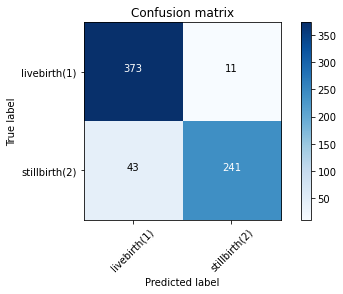

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  Previousoutcomepregnanancy=['livebirth(1)','stillbirth(2)'],normalize= False,  title='Confusion matrix')